HW2

Name : Sobhan Asasi

Std Num : 400206392

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Lambda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import random
import time

In [ ]:
data = pd.read_csv('./Data/international_matches.csv')
data.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


Text(0, 0.5, 'away_team_fifa_rank')

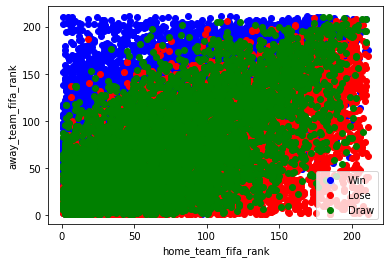

In [ ]:
data_1 = data[data['home_team_result'] == 'Win']
x_1 = data_1['home_team_fifa_rank']
y_1 = data_1['away_team_fifa_rank']

data_2 = data[data['home_team_result'] == 'Draw']
x_2 = data_2['home_team_fifa_rank']
y_2 = data_2['away_team_fifa_rank']

data_3 = data[data['home_team_result'] == 'Lose']
x_3 = data_3['home_team_fifa_rank']
y_3 = data_3['away_team_fifa_rank']

plt.scatter(x_1, y_1, c ="blue")
plt.scatter(x_3, y_3, c ="red")
plt.scatter(x_2, y_2, c ="green")
plt.legend(['Win', 'Lose', 'Draw'])
plt.xlabel('home_team_fifa_rank')
plt.ylabel('away_team_fifa_rank')

In [ ]:
data = data[(data['home_team_total_fifa_points'] != 0) & (data['away_team_total_fifa_points'] != 0)]
data = data[['home_team_total_fifa_points', 'home_team_fifa_rank', 'away_team_fifa_rank', 'away_team_total_fifa_points','home_team_result']]
data.head(10)

,home_team_total_fifa_points,home_team_fifa_rank,away_team_fifa_rank,away_team_total_fifa_points,home_team_result
14250,260,114,158,112,Win
14251,245,120,129,208,Draw
14252,298,108,88,364,Win
14253,325,101,98,328,Win
14254,338,96,127,221,Lose
14255,179,141,183,56,Win
14256,348,92,131,207,Win
14257,104,165,162,104,Win
14258,311,103,95,340,Win
14260,78,177,197,10,Win


In [ ]:
len(data)

9594

In [ ]:
data = data.replace({'home_team_result':{'Lose':0, 'Draw':1, 'Win':2}})
data= data.reset_index()
del data['index']
data.head(10)

,home_team_total_fifa_points,home_team_fifa_rank,away_team_fifa_rank,away_team_total_fifa_points,home_team_result
0,260,114,158,112,2
1,245,120,129,208,1
2,298,108,88,364,2
3,325,101,98,328,2
4,338,96,127,221,0
5,179,141,183,56,2
6,348,92,131,207,2
7,104,165,162,104,2
8,311,103,95,340,2
9,78,177,197,10,2


# Correlation Heatmap

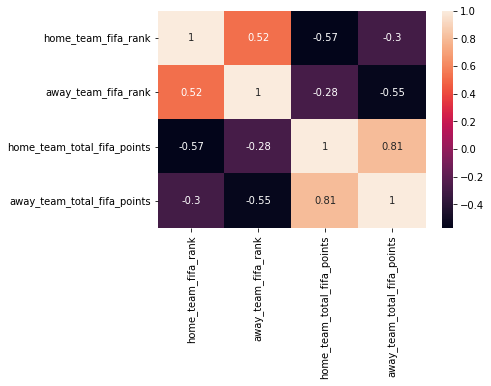

In [ ]:
import seaborn as sns
features = data[['home_team_fifa_rank', 'away_team_fifa_rank',
                  'home_team_total_fifa_points', 'away_team_total_fifa_points']]
sns.heatmap(features.corr(), annot=True)

In [ ]:
train_data = data.sample(frac=0.75,random_state=200)
test_data = data.drop(train_data.index)
print(f'size of train data is = {len(train_data)} and size of test data is {len(test_data)}')

size of train data is = 7196 and size of test data is 2398


In [ ]:
train_data.head(2)

,home_team_total_fifa_points,home_team_fifa_rank,away_team_fifa_rank,away_team_total_fifa_points,home_team_result
1168,1106,8,18,944,2
4543,289,126,79,436,1


In [ ]:
train_data_array = train_data.to_numpy()
test_data_array = test_data.to_numpy()

In [ ]:
train_data_array.shape[0]

7196

In [ ]:
train_mean = np.mean(train_data_array, axis=0)
train_std = np.std(train_data_array, axis=0)
train_mean[-1] = 0 
train_std[-1] = 1

In [ ]:
train_data_array = (train_data_array - train_mean) / train_std
test_data_array = (test_data_array - train_mean) / train_std

In [ ]:
data_train_mean = train_data.mean()
data_train_std = train_data.std()
train_data_normal = (train_data - data_train_mean) / data_train_std
train_data_normal['home_team_result'] = train_data['home_team_result']
test_data_normal = (test_data - data_train_mean) / data_train_std
test_data_normal['home_team_result'] = test_data['home_team_result']
train = train_data_normal.to_numpy()
test = test_data_normal.to_numpy()

In [ ]:
class DataSet(Dataset):
    def __init__(self, X_train, y_train, target_transform=None):
      self.target_transform = target_transform
      self.X = torch.tensor(X_train, dtype=torch.float32)
      self.y = torch.tensor(y_train, dtype=torch.int64)
      self.len = self.X.shape[0]
  
    def __getitem__(self, index):
      feature = self.X[index]
      label = self.target_transform(self.y[index])
      return feature, label  

    def __len__(self):
      return self.len


target_transform = Lambda(lambda y: torch.zeros(3, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y),
                                                                                    value=1))
dataset_train = DataSet(train_data_array[:, :-1], train_data_array[:, -1], target_transform=target_transform)
dataset_test = DataSet(test_data_array[:, :-1], test_data_array[:, -1], target_transform=target_transform)

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

batch_size = 64
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
#valid_loader = DataLoader(valid_dataset, batch_size=valid_size)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            nn.ReLU()
        )

    def forward(self, x):
        X = self.linear(x)
        y = F.softmax(X, dim=1)
        return y

model = NeuralNetwork()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-1
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def Train_Accuracy(dataloader, model, loss_fn):
    size = floor(len(dataloader.dataset) / batch_size) * batch_size
    num_batches = floor(len(dataloader.dataset) / batch_size)
    train_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            if len(X) < batch_size:
              break
            pred = model(X)
            train_loss += loss_fn(pred, y).item()
            #
            for i in range(batch_size):
              v1 = pred[i]
              v2 = y[i]
              if torch.argmax(v1) == torch.argmax(v2):
                correct += 1
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    train_loss /= num_batches
    correct /= size
    print(f"Train Dataset: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")

def Test_Accuracy(dataloader, model, loss_fn):
    size = floor(len(dataloader.dataset) / batch_size) * batch_size
    num_batches = floor(len(dataloader.dataset) / batch_size)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            if len(X) < batch_size:
              break
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            #
            for i in range(batch_size):
              v1 = pred[i]
              v2 = y[i]
              if torch.argmax(v1) == torch.argmax(v2):
                correct += 1
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Dataset: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        #print(X.shape, y.shape)
        pred = model(X)
        
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train()
    train_loop(train_loader, model, loss_fn, opt)
    model.eval()
    Train_Accuracy(train_loader, model, loss_fn)
    Test_Accuracy(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


<ipython-input-36-4a8e425e3213>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_transform = Lambda(lambda y: torch.zeros(3, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y),


Train Dataset: 
 Accuracy: 48.2%, Avg loss: 1.064713 

Test Dataset: 
 Accuracy: 49.7%, Avg loss: 1.060536 

Epoch 2
-------------------------------
Train Dataset: 
 Accuracy: 48.1%, Avg loss: 1.051422 

Test Dataset: 
 Accuracy: 49.6%, Avg loss: 1.045197 

Epoch 3
-------------------------------
Train Dataset: 
 Accuracy: 48.1%, Avg loss: 1.043109 

Test Dataset: 
 Accuracy: 49.8%, Avg loss: 1.034062 

Epoch 4
-------------------------------
Train Dataset: 
 Accuracy: 49.2%, Avg loss: 1.024767 

Test Dataset: 
 Accuracy: 50.4%, Avg loss: 1.017110 

Epoch 5
-------------------------------
Train Dataset: 
 Accuracy: 56.0%, Avg loss: 0.985532 

Test Dataset: 
 Accuracy: 57.3%, Avg loss: 0.974570 

Epoch 6
-------------------------------
Train Dataset: 
 Accuracy: 56.5%, Avg loss: 0.970076 

Test Dataset: 
 Accuracy: 58.2%, Avg loss: 0.957893 

Epoch 7
-------------------------------
Train Dataset: 
 Accuracy: 56.5%, Avg loss: 0.966309 

Test Dataset: 
 Accuracy: 59.0%, Avg loss: 0.948397

In [ ]:
print('Model Accuracy on Test Data \n-------------------------------\n')
Test_Accuracy(test_loader, model, loss_fn)
print(' \n-------------------------------')

Model Accuracy on Test Data 
-------------------------------

Test Dataset: 
 Accuracy: 60.1%, Avg loss: 0.940620 

 
-------------------------------


<ipython-input-36-4a8e425e3213>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_transform = Lambda(lambda y: torch.zeros(3, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y),


In [ ]:
mean = train_mean[:-1]
std = train_std[:-1]

# First Match With England
## Iran is away team
Rank = 20

Points = 1564.61
## England is home team
rank = 5

Points = 1728.41



In [ ]:
match_1 = torch.tensor((np.array([1728.47, 5, 20, 1564.61]) - mean) / std, dtype=torch.float32)
input_1 = torch.unsqueeze(match_1, dim=0)
with torch.no_grad():
  output_1 = model(input_1.to(device))
print(output_1)
print(f'The Probablity of winning of Iran is : {(output_1[0][0]*100):>0.02f} %')

tensor([[0.1574, 0.0467, 0.7959]])
The Probablity of winning of Iran is : 15.74 %


# Second Match with Wales

## Iran is away team
Rank = 20

Points = 1564.61

## Wales is home team
Rank = 19

Points = 1569.82

In [ ]:
with torch.no_grad():
  match_2 = torch.tensor((np.array([1569.82, 19, 20, 1564.61]) - mean) / std, dtype=torch.float32)
  input_2 = torch.unsqueeze(match_2, dim=0)
  output_2 = model(input_2.to(device))
print(match_2)
print(output_2)
print(f'The Probablity of winning of Iran is : {(output_2[0][0]*100):>0.02f} %')

tensor([ 1.5803, -1.1617, -1.2119,  1.6280])
tensor([[0.4166, 0.0743, 0.5091]])
The Probablity of winning of Iran is : 41.66 %


# Third Match With USA 

## Iran is home team
Rank = 20

Points = 1564.61

## USA is away team

Rank = 16

Points = 1627.48

In [ ]:
with torch.no_grad():
  match_3 = torch.tensor((np.array([1564.61, 20, 16, 1627.48]) - mean) / std, dtype=torch.float32)
  input_3 = torch.unsqueeze(match_3, dim=0)
  output_3 = model(input_3.to(device))
print(match_3)
print(output_3)
print(f'The Probablity of winning of Iran is : {(output_3[0][2]*100):>0.02f} %')

tensor([ 1.5696, -1.1436, -1.2850,  1.7587])
tensor([[0.5655, 0.0762, 0.3583]])
The Probablity of winning of Iran is : 35.83 %
